In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

sns.set()

In [2]:
# load environment variables
load_dotenv()

True

In [5]:
#loda data
df = pd.read_csv(os.getenv("RAW_DATA"), index_col = 'id_prose', usecols = ['id_prose', 'sin_fecha_siniestro', 'sin_relato'], sep=',')
df['sin_fecha_siniestro'] = pd.to_datetime(df['sin_fecha_siniestro'])
df['year'] = df.apply(lambda x: x['sin_fecha_siniestro'].year, axis=1)
df.sort_values('sin_fecha_siniestro', inplace=True)

In [6]:
print('Total registros:', len(df))

Total registros: 55626


In [7]:
df_steal_by_year = df.groupby('year').size().reset_index(name='steal_by_year')
df_steal_by_year

,year,steal_by_year
0,1900,1
1,1989,1
2,1990,1
3,1991,2
4,1992,2
5,1993,1
6,1994,2
7,1995,1
8,1996,3
9,1997,6


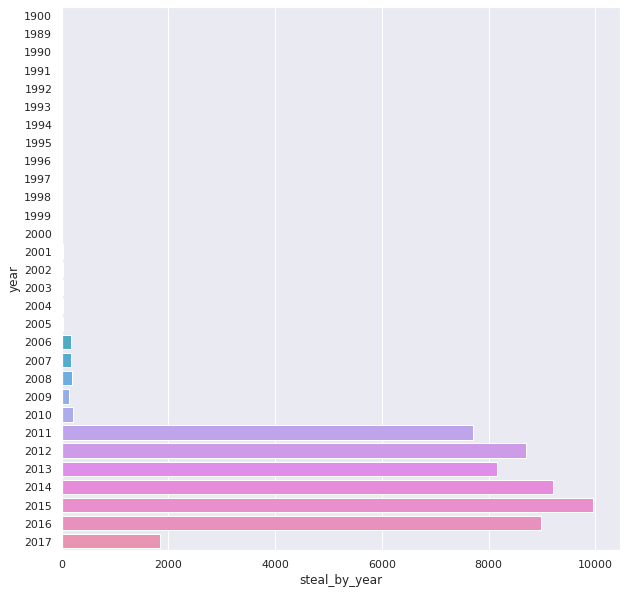

In [8]:
plt.figure(figsize=(10,10))
sns.barplot(y='year', x='steal_by_year', orient='h' , data=df_steal_by_year)

La base de datos esta balanceada entre los años 2011-2016, por tanto, se escogerá este como objetivo del experimento, pues del 2010 hacia atrás solo se cuenta con un una muestra no representativa de los deilitos y del 2017 solo se cuenta con el primer trimestre.

In [9]:
df_sinrelatonull_by_year = df[df['sin_relato'].isnull()==True].groupby('year').size().reset_index(name='sinrelatonull_by_year')
df_sinrelatonull_by_year['steal_by_year'] = df_steal_by_year[df_steal_by_year['year']>=2005].steal_by_year.to_list()
df_sinrelatonull_by_year['%'] = 100*df_sinrelatonull_by_year.sinrelatonull_by_year/df_sinrelatonull_by_year.steal_by_year
df_sinrelatonull_by_year

,year,sinrelatonull_by_year,steal_by_year,%
0,2005,5,30,16.666667
1,2006,100,174,57.471264
2,2007,80,170,47.058824
3,2008,131,188,69.680851
4,2009,44,142,30.985915
5,2010,75,210,35.714286
6,2011,679,7716,8.799896
7,2012,713,8711,8.185053
8,2013,604,8157,7.404683
9,2014,498,9207,5.408928


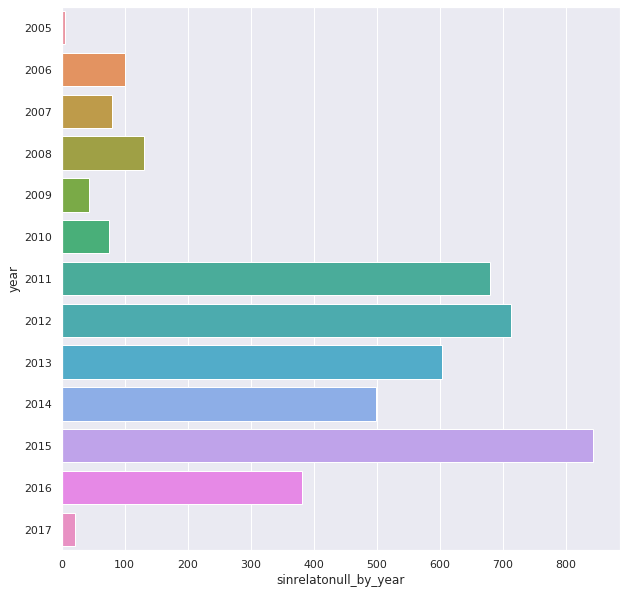

In [10]:
plt.figure(figsize=(10,10))
sns.barplot(y='year', x='sinrelatonull_by_year', orient='h' , data=df_sinrelatonull_by_year)

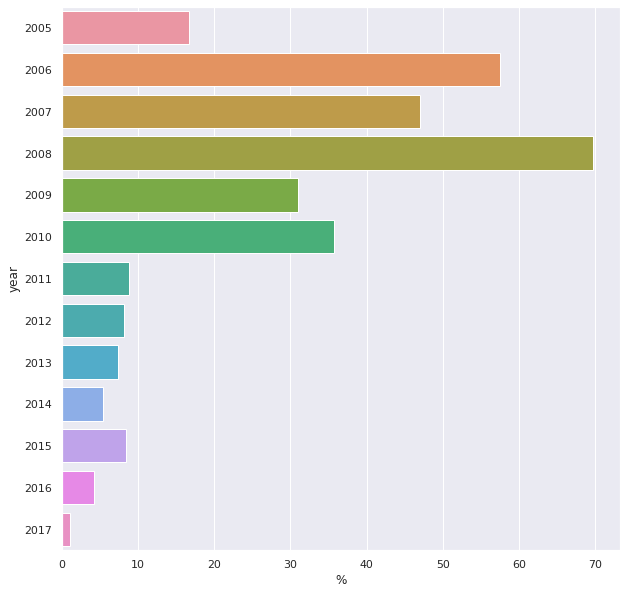

In [11]:
plt.figure(figsize=(10,10))
sns.barplot(y='year', x='%', orient='h' , data=df_sinrelatonull_by_year)

Se observa que previo al 2011 no solo la muestra de relatos es poco significativa en relación a los años posteriores sino que también presenta una gran cantidad de nulos en relación al total. Por otro lado, la candidad de relatos nulos en los años 2011-2016 se mueve entre  4.3-8.8 % del total.

# Resumen

La data objetivo es:

1. Se consideran solo los relatos entre el 2011-2016.
2. Se eliminan los registros sin relato, es decir, **sin_relato** nulo.